<a href="https://colab.research.google.com/github/indrasz/Strategi-Algoritma/blob/main/compare-algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

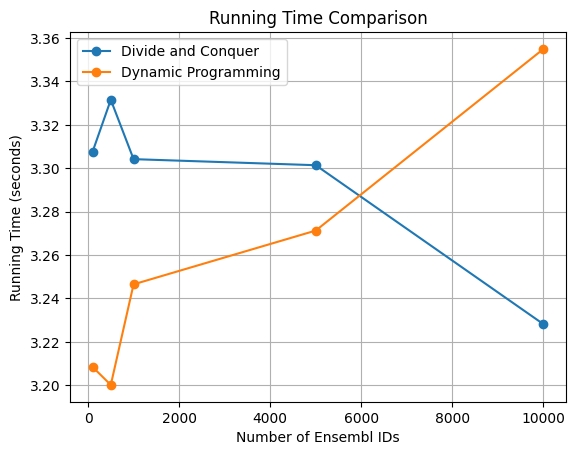

In [ ]:
import requests
import time
import matplotlib.pyplot as plt

# Function to get Ensembl information
def get_ensembl_info(ensembl_id, ensembl_type):
    base_url = "https://rest.ensembl.org"
    endpoints = {
        "gene": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "transcript": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "protein": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json"
    }

    url = endpoints.get(ensembl_type)
    if url is None:
        return None

    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Divide and conquer approach
def divide_and_conquer(ensembl_ids):
    results = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        info = get_ensembl_info(ensembl_id, ensembl_type)
        if info:
            results[ensembl_type] = info
        else:
            results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Dynamic programming approach
def dynamic_programming(ensembl_ids):
    results = {}
    cache = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        if ensembl_id in cache:
            results[ensembl_type] = cache[ensembl_id]
        else:
            info = get_ensembl_info(ensembl_id, ensembl_type)
            if info:
                cache[ensembl_id] = info
                results[ensembl_type] = info
            else:
                results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Ensembl IDs provided
ensembl_ids = {
    "gene": "ENSG00000186092",
    "transcript": "ENST00000641515",
    "protein": "ENSP00000493376"
}

# Benchmarking and comparison
divide_times = []
dynamic_times = []
sizes = [100, 500, 1000, 5000, 10000]  # Different input sizes

for size in sizes:
    test_ids = {k: ensembl_ids[k] for k in list(ensembl_ids.keys()) * size}

    # Time divide and conquer
    start_time = time.time()
    divide_and_conquer(test_ids)
    end_time = time.time()
    divide_times.append(end_time - start_time)

    # Time dynamic programming
    start_time = time.time()
    dynamic_programming(test_ids)
    end_time = time.time()
    dynamic_times.append(end_time - start_time)

# Plotting the results
plt.plot(sizes, divide_times, label='Divide and Conquer', marker='o')
plt.plot(sizes, dynamic_times, label='Dynamic Programming', marker='o')
plt.xlabel('Number of Ensembl IDs')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time Comparison')
plt.legend()
plt.grid(True)
plt.show()